## 1_3 Top 10 Makes of EVs in the Parc 

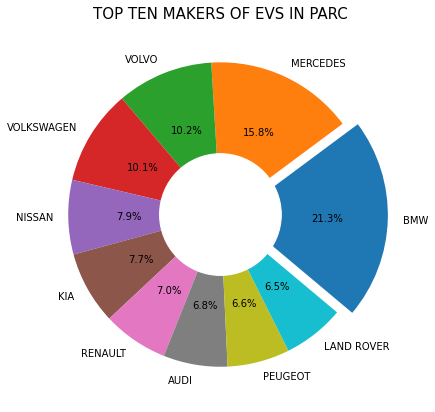

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'url_to_your_csv_file' with the raw GitHub URL of your CSV file

csv_url = 'https://raw.githubusercontent.com/varunraaju/Battery_Cycle_Plots/main/1_3/VEH0171b_GenModels.csv?token=GHSAT0AAAAAACFKR6ADN7W4ZUR7MGBI5XSEZGI4FIA'
# Read the CSV file into a DataFrame, skipping the first 4 rows
df = pd.read_csv(csv_url, skiprows=4)

# Save the first four columns in a separate DataFrame with the renamed names
first_four_columns = df.iloc[:, :6].rename(columns={df.columns[2]: 'BODY TYPE', df.columns[3]: 'MAKE', df.columns[4]: 'MODEL', df.columns[5]: 'FUEL'})

# Drop the first two columns from the original DataFrame
df.drop(df.columns[:4], axis=1, inplace=True)

# Create a new DataFrame to store the sums
sum_df = pd.DataFrame(index=df.index)

# Iterate through columns and group by left 4 characters of the header
for col in df.columns:
    header_prefix = col[:4]
    if header_prefix not in sum_df.columns:
        selected_columns = df.loc[:, df.columns.str[:4] == header_prefix]
        sum_df[header_prefix] = pd.to_numeric(selected_columns.stack(), errors='coerce').groupby(level=0).sum()

# Print the first few rows of the new DataFrame with sums and the first four columns unchanged
result_df = pd.concat([first_four_columns, sum_df], axis=1)
new_df = result_df.drop(result_df.columns[[0, 1, 6, 7]], axis=1)

# Calculate the sum of numbers from the 5th column till the last column and add a new "TOTAL" column
new_df['TOTAL'] = new_df[new_df.columns[2:]].sum(axis=1)

# Filter out rows where 'MODEL' column contains the string "MISSING"
clean_data = new_df[~new_df['MODEL'].str.contains("MISSING")]
# print(clean_data)
##############################################################################

# Create a new DataFrame "TOP_TEN" that groups all the similar "MAKE" and calculates the sum of groups
TOP_TEN = clean_data.groupby('MAKE', as_index=False)['TOTAL'].sum()
TOP_TEN.rename(columns={'TOTAL': 'SUM OF TOTAL'}, inplace=True)

# Sort the DataFrame in descending order based on the 'SUM OF TOTAL' column
TOP_TEN = TOP_TEN.sort_values(by='SUM OF TOTAL', ascending=False)

# Keep only the top ten rows
TOP_TEN = TOP_TEN.head(10)

# print(TOP_TEN)

perc1 = TOP_TEN["SUM OF TOTAL"]  # Corrected variable name here
maker = TOP_TEN["MAKE"]  # Corrected variable name here

myexplode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.pie(perc1, labels=maker, autopct='%1.1f%%', startangle=-40, explode=myexplode)
plt.title("TOP TEN MAKERS OF EVS IN PARC", fontsize=15, color="black")

    # Add a circle at the center to transform it into a donut chart
my_circle = plt.Circle((0, 0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()